In [1]:
import pandas as pd
import geopandas as gpd
import shapely

import numpy as np
import os
import re

# Load dataframes

In [2]:
from etl import load_debt, load_receipt, load_filer, load_expense, load_contributions

In [3]:
debt = load_debt()
receipt = load_receipt()
filer = load_filer()
expense = load_expense()
contrib = load_contributions()

Loading data frame from data/debt.pkl.
Data frame loaded.
Loading data frame from data/receipt.pkl.
Data frame loaded.
Loading data frame from data/filer.pkl.
Data frame loaded.
Loading data frame from data/expense.pkl.
Data frame loaded.
Loading data frame from data/contrib.pkl.
Data frame loaded.


# Load PA house

In [4]:
fname = os.path.join('data', 'PA_house.geojson')

with open(fname, 'r') as f:
    a = f.readlines()
pa_counties = gpd.read_file(fname, driver='GeoJSON')

## Plotting

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(foreground, background):
    base = background.plot(color='white', edgecolor='black')
    return foreground.plot(ax=base, marker='*', color='red', markersize=5);

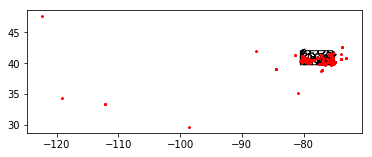

In [6]:
plot(debt, pa_counties);

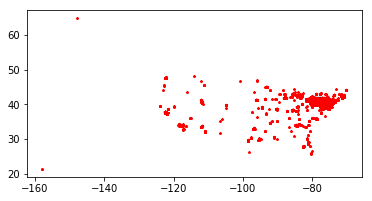

In [7]:
plot(expense, pa_counties);

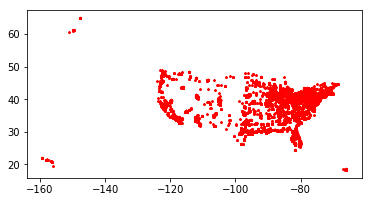

In [8]:
plot(contrib, pa_counties);

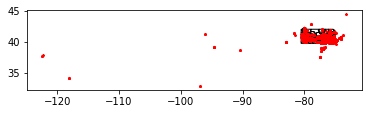

In [9]:
plot(filer, pa_counties);

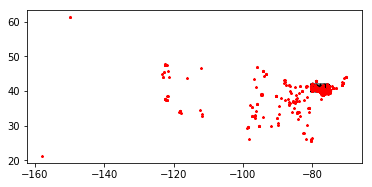

In [10]:
plot(receipt, pa_counties);

## simplified $l^\infty$ distance finding

* Each degree of latitude is approximately 69 miles (111 kilometers) apart.
    * 1 mile $\approx 1/69$ degree
* Each degree of longitude is about $\frac{a \pi}{180} \cos (lat)$, where $a = 3,959$ miles.
    * 1 mile $\approx \frac{180 \sec(lat)}{3959 \pi}$


In [11]:
import math

def lat_to_mile():
    return 1.0 / 69.0


def long_to_mile(lat):
    return 180 / (3959 * math.pi * math.cos(lat * math.pi / 180))


def filter_distance(df, lat, long, dist):
    delta_lat = dist * lat_to_mile()
    delta_long = dist * long_to_mile(lat)
    return df[df.lat.between(lat - delta_lat, lat + delta_lat)
              & df.long.between(long - delta_long, long + delta_long)]

*TO DO:* make the above work correctly with the current configuation.